# Importing required libraries

In [2]:
import numpy as np # for matrix calculations
import os # for file hiearchy handling
import matplotlib.pyplot as plt # plotting the images and data
import matplotlib.image as mpimg # reading the images
from  sklearn.model_selection import train_test_split # for preprocessing 
from PIL import Image # image processing
import glob # file handing and folder scanner
import cv2 # for converting images to matrix

# Getting folder paths of each images in list

In [3]:
listOfSubNumberDict = os.listdir("/kaggle/input/practice2/imgs")
path = '/kaggle/input/practice2/imgs/'
listOfSubNumberDict.sort()
print(listOfSubNumberDict)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


# getting data from images and display images

The height of the image is:  70
The width of the image is:  50


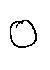

In [9]:
# getting views of images in dataset
filepath = "/kaggle/input/practice2/imgs/0/1.jpg"
img = Image.open(filepath)
  
# get width and height
width = img.width
height = img.height
  
# display width and height
print("The height of the image is: ", height)
print("The width of the image is: ", width)

Image.open("/kaggle/input/practice2/imgs/0/1.jpg")

# finding number of images in each folder

In [11]:
for i in listOfSubNumberDict:
      print(f'there is {len(os.listdir(f"/kaggle/input/practice2/imgs/{i}"))} of images of {i}')

there is 130 of images of 0
there is 130 of images of 1
there is 130 of images of 2
there is 130 of images of 3
there is 130 of images of 4
there is 130 of images of 5
there is 130 of images of 6
there is 130 of images of 7
there is 130 of images of 8
there is 130 of images of 9


# converting all images of 0-9 to matrix in form of numpy array

In [12]:
img_extension = ['jpg']
files = []

for i in listOfSubNumberDict:
    allImgPath = f'/kaggle/input/practice2/imgs/{i}/'
    [files.extend(glob.glob(allImgPath + '*.' + e)) for e in img_extension]

allImg = np.asarray([cv2.imread(file) for file in files])

# getting information of matrix converted from images

In [13]:
print(allImg.shape)
print(allImg[0].shape)
print(allImg.dtype)
print(type(allImg))
print(len(allImg))

(1300, 70, 50, 3)
(70, 50, 3)
uint8
<class 'numpy.ndarray'>
1300


# labelling the list of images for training

In [14]:
counter = 0
dig = 0
labels = []
for i in range(0,130):
    labels.append(0)

while(dig<=9):
    if(counter%130==0):
        dig +=1
    labels.append(dig)
    counter+=1
labels.remove(10)
labels = np.array(labels)

# verifing the labels

In [15]:
print(labels)
c=0
for i in range(0,10):
    for j in labels:
        if i==j:
            c += 1
    print(f"number of {i} is {c}")
    c = 0

[0 0 0 ... 9 9 9]
number of 0 is 130
number of 1 is 130
number of 2 is 130
number of 3 is 130
number of 4 is 130
number of 5 is 130
number of 6 is 130
number of 7 is 130
number of 8 is 130
number of 9 is 130


# scaling the matrix for getting values of each elements 0-1 that will optimise the training

In [16]:
for i in range(0, len(allImg)):
    allImg[i] = allImg[i]/255


# Train - Test Split for finding accuracy of unidentified images

In [17]:
X = allImg
Y = np.asarray(labels)
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

# getting number of images splitted by train test split

In [18]:
print (f'The X images are splitted into train set : {len(x_train)} test set : {len(x_test)}')
print (f'The Y labels are splitted into train set : {len(y_train)} test set : {len(y_test)}')
print(x_train[0])

The X images are splitted into train set : 1040 test set : 260
The Y labels are splitted into train set : 1040 test set : 260
[[[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 ...

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]]


# importing tensorflow for building the model

In [19]:
import tensorflow as tf

# implementing neural network

In [20]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# feed the model with our training matrix and testing labels

In [28]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
33/33 [==============================] - 0s 14ms/step - loss: 0.1337 - accuracy: 0.9644
Epoch 2/10
33/33 [==============================] - 0s 13ms/step - loss: 0.1336 - accuracy: 0.9712
Epoch 3/10
33/33 [==============================] - 0s 13ms/step - loss: 0.0909 - accuracy: 0.9846
Epoch 4/10
33/33 [==============================] - 0s 13ms/step - loss: 0.0858 - accuracy: 0.9856
Epoch 5/10
33/33 [==============================] - 0s 13ms/step - loss: 0.0597 - accuracy: 0.9962
Epoch 6/10
33/33 [==============================] - 0s 13ms/step - loss: 0.0424 - accuracy: 0.9971
Epoch 7/10
33/33 [==============================] - 0s 13ms/step - loss: 0.0364 - accuracy: 1.0000
Epoch 8/10
33/33 [==============================] - 0s 13ms/step - loss: 0.0285 - accuracy: 1.0000
Epoch 9/10
33/33 [==============================] - 0s 13ms/step - loss: 0.0273 - accuracy: 1.0000
Epoch 10/10
33/33 [==============================] - 0s 13ms/step - loss: 0.0207 - accuracy: 1.0000


# finding loss and accuracy of unidentified images

In [29]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc*100)

9/9 [==============================] - 0s 4ms/step - loss: 0.9341 - accuracy: 0.7538
0.9341462254524231
75.38461685180664
